In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
pd.options.mode.chained_assignment = None

In [2]:
import pandas as pd

# wczytanie zestawu danych uczących
raw_data_train = pd.read_csv('~/nba-dl/data/matches/RS/book-RS.csv')

In [3]:
# wymiary zbioru danych - (wiersze, kolumny)
raw_data_train.shape

(24154, 41)

In [4]:
# wyświetlenie pierwszych trzech elementów
raw_data_train.head(3)

,SEASON_ID,HOME_TEAM_NAME,AWAY_TEAM_NAME,GAME_ID,GAME_DATE,HWIN,HPLUSMINUS,HFGM,HFGA,HFG_PCT,...,AFTA,AFT_PCT,AOREB,ADREB,AREB,AAST,ASTL,ABLK,ATOV,APF
0,21999,Charlotte Hornets,Toronto Raptors,29901035,2000-03-31,W,9.0,39,79,0.494,...,21,0.762,14,31,45,26,7,5,15,30
1,21999,Indiana Pacers,Denver Nuggets,29900860,2000-03-07,W,1.0,30,78,0.385,...,8,0.750,21,39,60,17,5,3,15,24
2,21999,New Jersey Nets,Cleveland Cavaliers,29901177,2000-04-19,L,-3.0,40,89,0.449,...,22,0.727,10,37,47,32,10,3,17,30


In [5]:
# stworzenie listy z numerycznymi danymi
columns = ['HWIN',
           'HFGM', 'HFGA', 'HFG_PCT', 'HFG3M', 'HFG3A', 'HFG3_PCT', 'HFTM', 'HFTA', 'HFT_PCT',
           'HOREB', 'HDREB', 'HREB', 'HAST', 'HSTL', 'HBLK', 'HTOV', 'HPF',
           'AFGM', 'AFGA', 'AFG_PCT', 'AFG3M', 'AFG3A', 'AFG3_PCT', 'AFTM', 'AFTA', 'AFT_PCT',
           'AOREB', 'ADREB', 'AREB', 'AAST', 'ASTL', 'ABLK', 'ATOV', 'APF']

# stworzenie nowego zestawu danych z wybranych statystyk
data_train = raw_data_train[columns]
data_train.head(3)

,HWIN,HFGM,HFGA,HFG_PCT,HFG3M,HFG3A,HFG3_PCT,HFTM,HFTA,HFT_PCT,...,AFTA,AFT_PCT,AOREB,ADREB,AREB,AAST,ASTL,ABLK,ATOV,APF
0,W,39,79,0.494,4,12,0.333,28,30,0.933,...,21,0.762,14,31,45,26,7,5,15,30
1,W,30,78,0.385,7,19,0.368,23,32,0.719,...,8,0.750,21,39,60,17,5,3,15,24
2,L,40,89,0.449,5,11,0.455,23,29,0.793,...,22,0.727,10,37,47,32,10,3,17,30


In [6]:
# opis poszczególnych statystyk
data_train.describe()

,HFGM,HFGA,HFG_PCT,HFG3M,HFG3A,HFG3_PCT,HFTM,HFTA,HFT_PCT,HOREB,...,AFTA,AFT_PCT,AOREB,ADREB,AREB,AAST,ASTL,ABLK,ATOV,APF
count,24154.000000,24154.000000,24154.000000,24154.000000,24154.000000,24154.000000,24154.000000,24154.000000,24154.000000,24154.000000,...,24154.000000,24154.000000,24154.000000,24154.000000,24154.000000,24154.000000,24154.000000,24154.000000,24154.000000,24154.000000
mean,37.734702,82.282231,0.459618,6.989526,19.418233,0.356756,18.649996,24.611700,0.758554,11.366440,...,23.607394,0.756082,11.029271,30.726588,41.755858,21.107725,7.560901,4.620850,14.047942,21.474331
std,5.295061,7.728873,0.056808,3.638958,7.900855,0.120779,6.338755,7.850081,0.099730,4.047894,...,7.553324,0.102972,3.959669,5.344786,6.456121,5.013086,2.897159,2.459221,3.940520,4.595665
min,19.000000,54.000000,0.247000,0.000000,1.000000,0.000000,1.000000,1.000000,0.143000,1.000000,...,1.000000,0.143000,0.000000,12.000000,20.000000,4.000000,0.000000,0.000000,3.000000,5.000000
25%,34.000000,77.000000,0.420000,4.000000,14.000000,0.278000,14.000000,19.000000,0.696000,9.000000,...,18.000000,0.692000,8.000000,27.000000,37.000000,18.000000,6.000000,3.000000,11.000000,18.000000
50%,38.000000,82.000000,0.458000,7.000000,18.000000,0.357000,18.000000,24.000000,0.765000,11.000000,...,23.000000,0.762000,11.000000,31.000000,42.000000,21.000000,7.000000,4.000000,14.000000,21.000000
75%,41.000000,87.000000,0.500000,9.000000,24.000000,0.433000,23.000000,30.000000,0.826000,14.000000,...,28.000000,0.828000,14.000000,34.000000,46.000000,24.000000,9.000000,6.000000,17.000000,24.000000
max,62.000000,125.000000,0.684000,27.000000,70.000000,1.000000,48.000000,64.000000,1.000000,33.000000,...,64.000000,1.000000,38.000000,56.000000,81.000000,46.000000,20.000000,18.000000,32.000000,42.000000


In [7]:
# mapowanie przewidywanej wielkości do wartości numerycznych

data_train['HWIN'] = data_train['HWIN'].map({'W': 1, 'L': 0})
data_train.head()

,HWIN,HFGM,HFGA,HFG_PCT,HFG3M,HFG3A,HFG3_PCT,HFTM,HFTA,HFT_PCT,...,AFTA,AFT_PCT,AOREB,ADREB,AREB,AAST,ASTL,ABLK,ATOV,APF
0,1,39,79,0.494,4,12,0.333,28,30,0.933,...,21,0.762,14,31,45,26,7,5,15,30
1,1,30,78,0.385,7,19,0.368,23,32,0.719,...,8,0.750,21,39,60,17,5,3,15,24
2,0,40,89,0.449,5,11,0.455,23,29,0.793,...,22,0.727,10,37,47,32,10,3,17,30
3,1,47,79,0.595,4,8,0.500,10,20,0.500,...,28,0.679,10,18,28,20,9,4,16,25
4,0,38,92,0.413,4,15,0.267,20,25,0.800,...,35,0.771,12,26,38,26,6,3,17,20


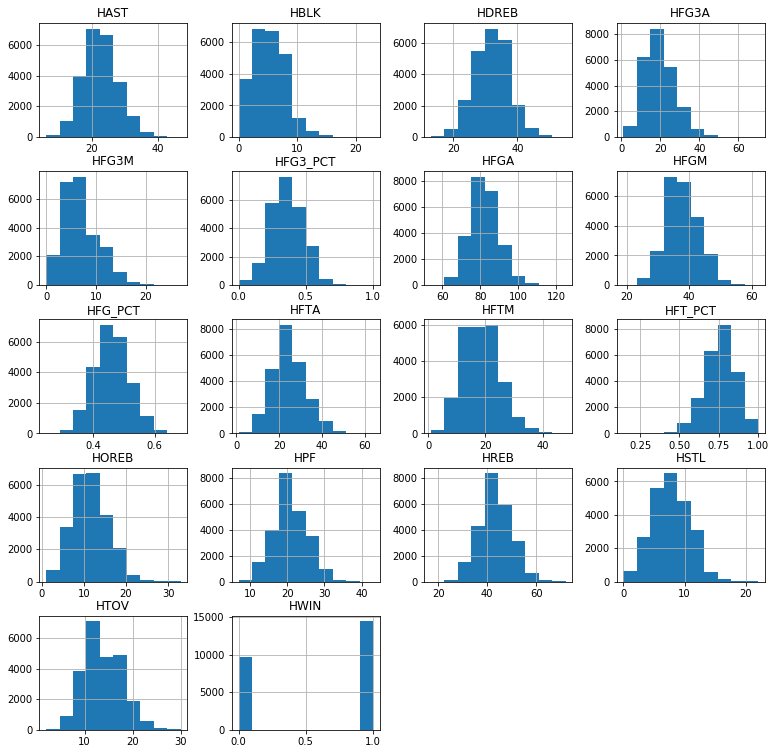

In [18]:
import matplotlib
import matplotlib.pyplot as plt
'''
Wizualizacja danych.
W zbiorze zostały wykorzyste te same typy statystyk dla drużyny gospodarzy i gości.
Dla zachowania przejrzystości wykorzystano tylko pierwszą część.
'''

stats = ['HWIN', 'HFGM', 'HFGA', 'HFG_PCT', 'HFG3M', 'HFG3A', 'HFG3_PCT', 'HFTM', 'HFTA',
         'HFT_PCT', 'HOREB', 'HDREB', 'HREB', 'HAST', 'HSTL', 'HBLK', 'HTOV', 'HPF']
visualize_data = data_train[stats]
# generowanie histogramu dla każdej ze statystyk
visualize_data.hist()
plt.rcParams["figure.figsize"] = (11,11)
plt.show()

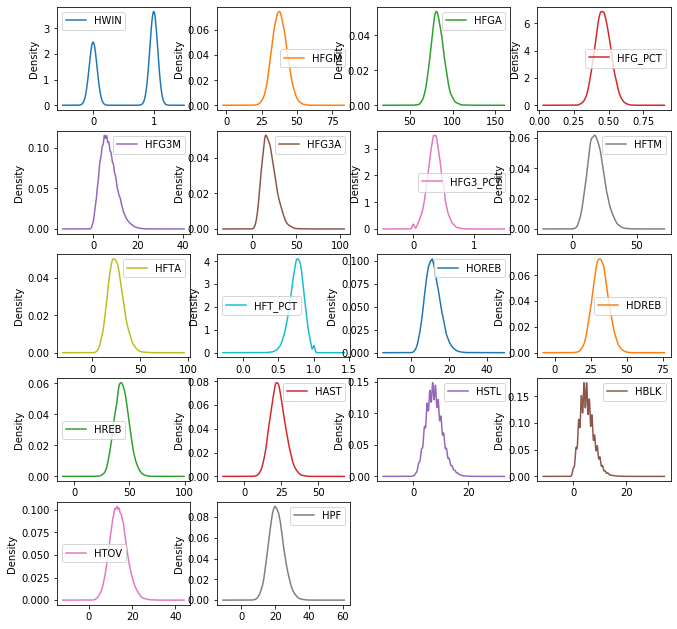

In [19]:
'''
Wykres zagęszczenia - drugi sposób na wizualizację rozkładu danych
'''
visualize_data.plot(kind='density', subplots=True, layout=(5,4), sharex=False)
plt.rcParams["figure.figsize"] = (11,11)
plt.show()

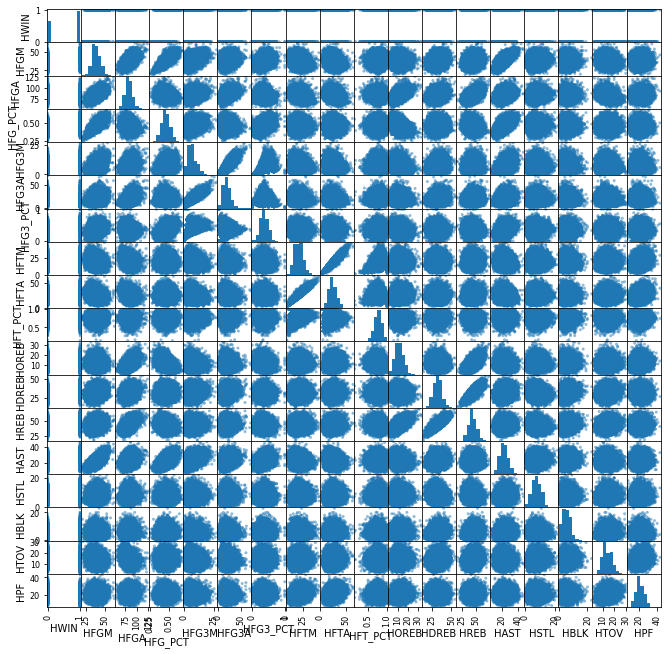

In [10]:
'''
Wykres punktowy

Pomocny w badaniu zależności pomiędzy statystykami. 
Poniższe polecenia tworzą wykres punktowy dla każdej z par statystyk. 
'''

from pandas.plotting import scatter_matrix
scatter_matrix(visualize_data)
plt.rcParams["figure.figsize"] = (11,11)
plt.show()

In [11]:
# FEATURE SELECTION METHODS

In [12]:
import seaborn as sns
'''
Współczynnik korelacji Pearsona

Może przyjmować wartości pomiędzy -1 a 1.
Wartość równa 0 wskazuje brak relacji pomiędzy zmiennymi.
Wartość większa od 0 wskazuje pozytywną relację pomiędzy zmiennymi.
Wartość niższa od 0 wskazuje negatywną relację pomiędzy zmiennymi.
'''
cor = data_train.corr()
cor_target = abs(cor['HWIN'])
# stworzenie listy ze statystykami posiadającymi wskaźnik korelacji ze zmienną przewidywaną > 0.3
relevant_pearson = cor_target[cor_target>0.3]
relevant_pearson = list(relevant_pearson.keys()[1:])
print("Znaczące statystyki:{}".format(relevant_pearson))

Znaczące statystyki:['HFGM', 'HFG_PCT', 'HDREB', 'HAST', 'AFGM', 'AFG_PCT', 'ADREB']


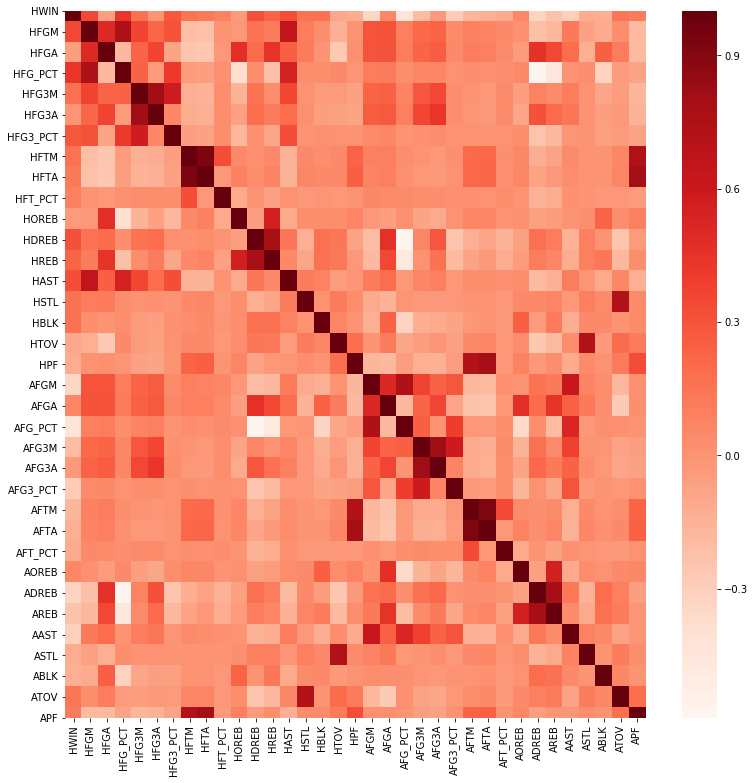

In [13]:
# stworzenie "mapy ciepła" - współczynnik korelacji Pearsona cd.
plt.rcParams["figure.figsize"] = (13,13)
sns.heatmap(cor, cmap=plt.cm.Reds)
plt.show()

In [14]:
# podział zbioru uczącego na cechy(statystyki) oraz wielkość wyjściową(przewidywaną)
X_train = data_train.drop("HWIN", 1)
y_train = data_train["HWIN"]

In [15]:
"""
Analiza jednoczynnikowa

Do selekcji statystyk o największej korelacji z wielkością wyjściową można użyć analizy jednoczynnikowej.
Biblioteka scikit-learn posiada klasę SelectKBest, która umożliwia dobór K najlepiej skorelowanych cech
w oparciu o daną metodę testu statystycznego. 
Statystyki z największymi wynikami mają najlepszą relację z wielkością wyjściową.
"""

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func=chi2)
fit = test.fit(X_train, y_train)
set_printoptions(precision=5)

stats_dict_us = {}

for i in range(len(columns[1:])):
    stats_dict_us[str(columns[i+1])] = fit.scores_[i]
# wypisanie najlepszych statystyk w oparciu o badaną metodę
sorted(stats_dict_us.items(), key=lambda x: x[1], reverse=True)[:7]

[('HAST', 3033.231097915293),
 ('AAST', 2572.379707190321),
 ('ADREB', 2428.994042741848),
 ('HDREB', 2192.675782105841),
 ('HFGM', 2171.604663718264),
 ('AFGM', 2025.6847624750244),
 ('AFG3M', 1737.324253058538)]

In [16]:
'''
Rekursywna eliminacja cech

Metoda rekursywnie usuwa kolejne rodzaje danych ze zbioru w celu wyodrębnienia zadanej ilości cech najlepiej
skorelowanych z wielkością wyjściową. Poniższy przykład wykorzystuje rekursywną eliminację cech przy użyciu
modelu regresji logistycznej.
'''
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 7)
fit = rfe.fit(X_train, y_train)

stats_dict_rfe = {}
support = fit.get_support()
for i in range(len(columns[1:])):
    stats_dict_rfe[str(columns[i+1])] = support[i]
# wypisanie najlepszych statystyk w oparciu o badaną metodę
[item for item in stats_dict_rfe.items() if item[1] == True]

[('HFGM', True),
 ('HFG3M', True),
 ('HFG3_PCT', True),
 ('HFTM', True),
 ('AFGM', True),
 ('AFG3M', True),
 ('AFTM', True)]

In [17]:
'''
Ocena ważności zmiennych

Do oceny ważności cech badanego zbioru można wykorzystać drzewa decyzyjne takie jak:
- las losowy (ang. Random Forest)
- wyjątkowy las losowy (ang. Extra Trees)
Statystyki z największymi wynikami są najlepiej skorelowane z wartością wyjściową.
'''
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train, y_train)
stats_dict_featureimportance = {}
for i in range(len(columns[1:])):
    stats_dict_featureimportance[str(columns[i+1])] = model.feature_importances_[i]
# wypisanie najlepszych statystyk w oparciu o badaną metodę
sorted(stats_dict_featureimportance.items(), key=lambda x: x[1], reverse=True)[:7]

[('AFG_PCT', 0.08307064117520123),
 ('HFG_PCT', 0.07191415227705152),
 ('HFGM', 0.0612284933854277),
 ('AFGM', 0.06058767892700893),
 ('ADREB', 0.05099151212308347),
 ('HDREB', 0.044075640349232385),
 ('HFG3_PCT', 0.037927728134153654)]